# Setup

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from rl_env.pendulum_env import CustomInvertedPendulum
from agent.utils import SimplePolicyNet
from agent.evolution_strategy import EvolutionStrategy


# Load Policy

In [4]:
def load_policy(policy, filename='trained_policy.npy'):
    try:
        # Construct the full file path
        file_path = os.path.join("../models", filename)
        
        # Load the flattened parameters from the file
        flat_params = np.load(file_path)
        
        # Set the loaded parameters to the policy
        policy.set_flat_params(flat_params)
        print(f"Policy loaded from '{file_path}'")
        return policy
    except Exception as e:
        print(f"Error loading policy: {e}")
        return None

In [5]:
policy = SimplePolicyNet(input_dim=3, output_dim=1, hidden_dim=16)
trained_policy = load_policy(policy, filename='trained_policy.npy')

Policy loaded from '../models\trained_policy.npy'


# Run Sample Run

In [6]:
env = CustomInvertedPendulum()

# Run one rollout using the trained policy
states = []
rewards = []
actions = []

state = env.reset()
for _ in range(200):
    action = policy.get_action(state)
    next_state, reward, done = env.step(action)

    states.append(state)
    actions.append(action)
    rewards.append(reward)

    state = next_state


<string>:3: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))


# Plot Metrics Over Time

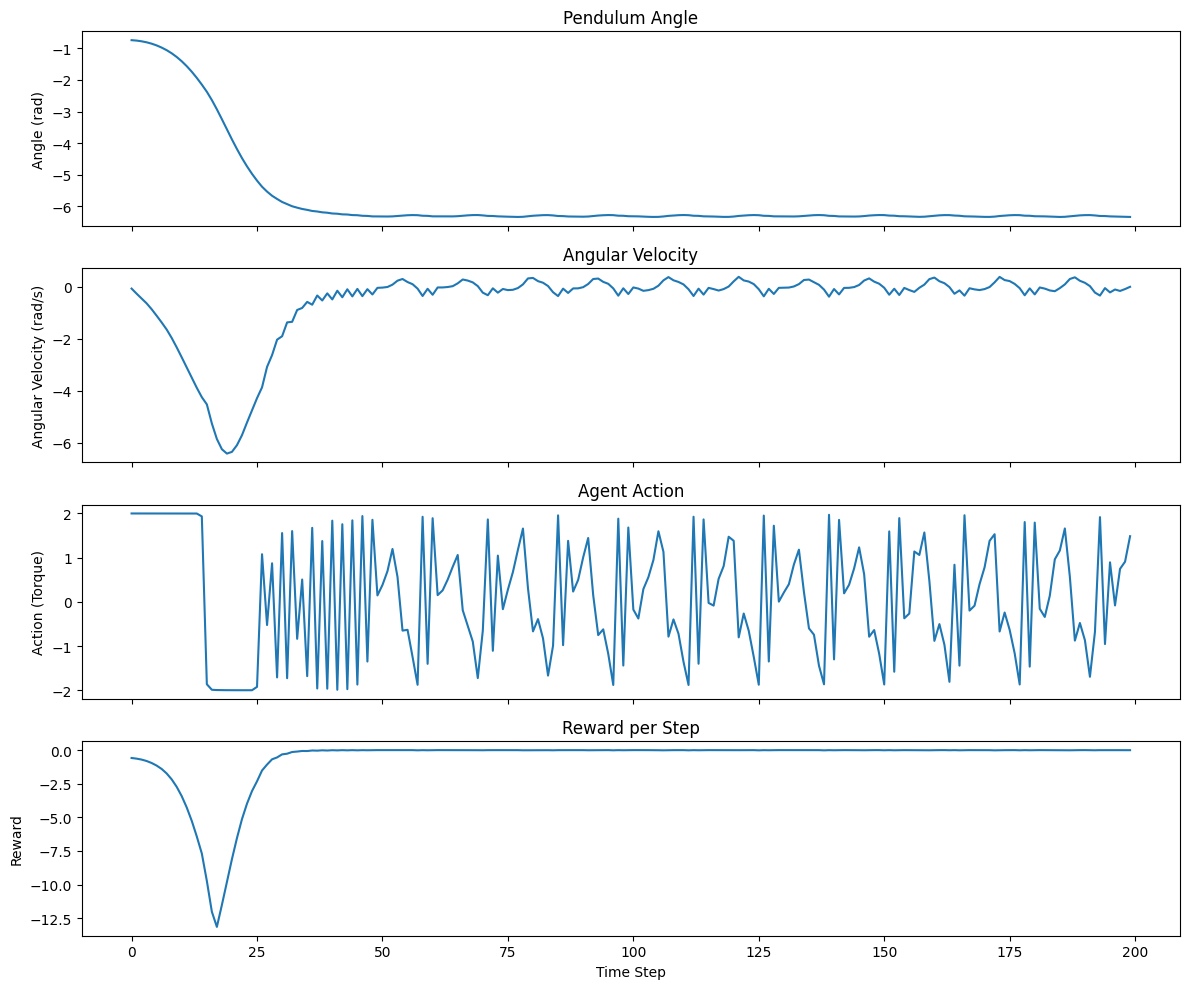

In [7]:
# Convert collected data
states = np.array(states)
angles = states[:, 0]
angular_velocities = states[:, 1]
rewards = np.array(rewards)
actions = np.array(actions)

# Plot trajectory
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(angles)
axs[0].set_ylabel("Angle (rad)")
axs[0].set_title("Pendulum Angle")

axs[1].plot(angular_velocities)
axs[1].set_ylabel("Angular Velocity (rad/s)")
axs[1].set_title("Angular Velocity")

axs[2].plot(actions)
axs[2].set_ylabel("Action (Torque)")
axs[2].set_title("Agent Action")

axs[3].plot(rewards)
axs[3].set_ylabel("Reward")
axs[3].set_xlabel("Time Step")
axs[3].set_title("Reward per Step")

plt.tight_layout()
plt.show()


# Visualize Pendulum

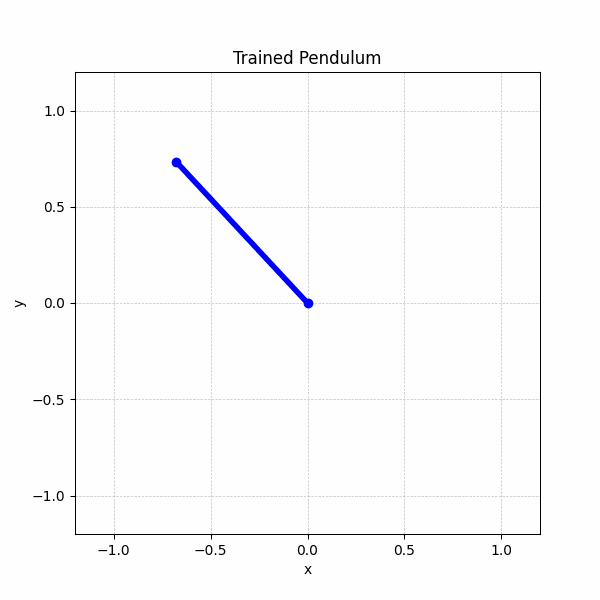

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image

# Compute pendulum tip positions
L = env.L
x = L * np.sin(angles)
y = L * np.cos(angles)

# Create figure and plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-L - 0.2, L + 0.2)
ax.set_ylim(-L - 0.2, L + 0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Trained Pendulum")
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

line, = ax.plot([], [], 'o-', lw=4, color='blue')

def init():
    line.set_data([], [])
    return line,

def update(i):
    line.set_data([0, x[i]], [0, y[i]])
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(x), init_func=init, interval=30, blit=True)

# Save to GIF
gif_path = "../figs/trained_pendulum.gif"
ani.save(gif_path, writer="pillow", fps=30)
plt.close()

# Display the GIF
Image(filename=gif_path)


# Visualize Pendulum and Metrics

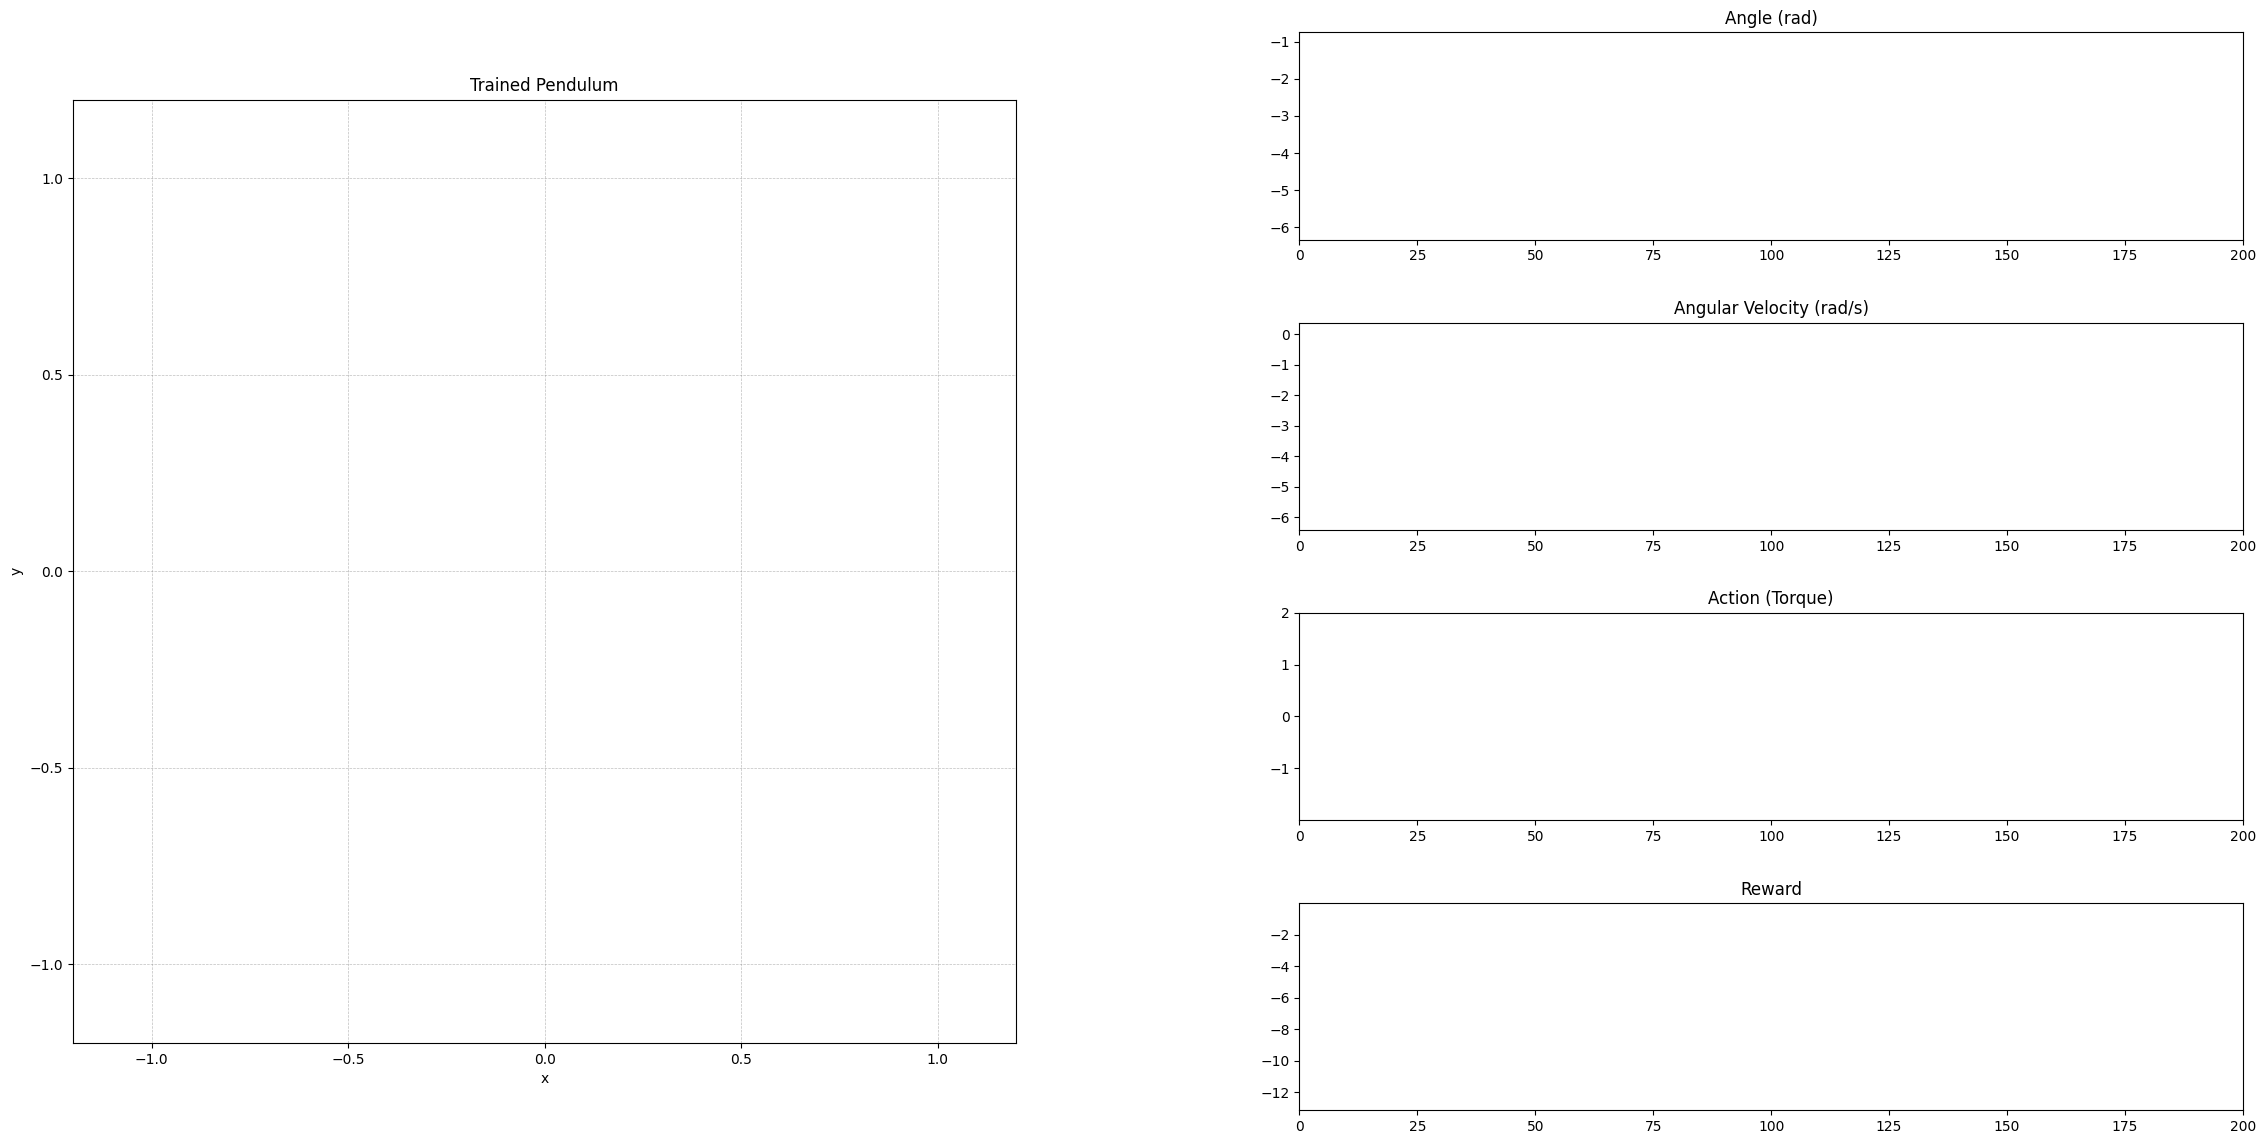

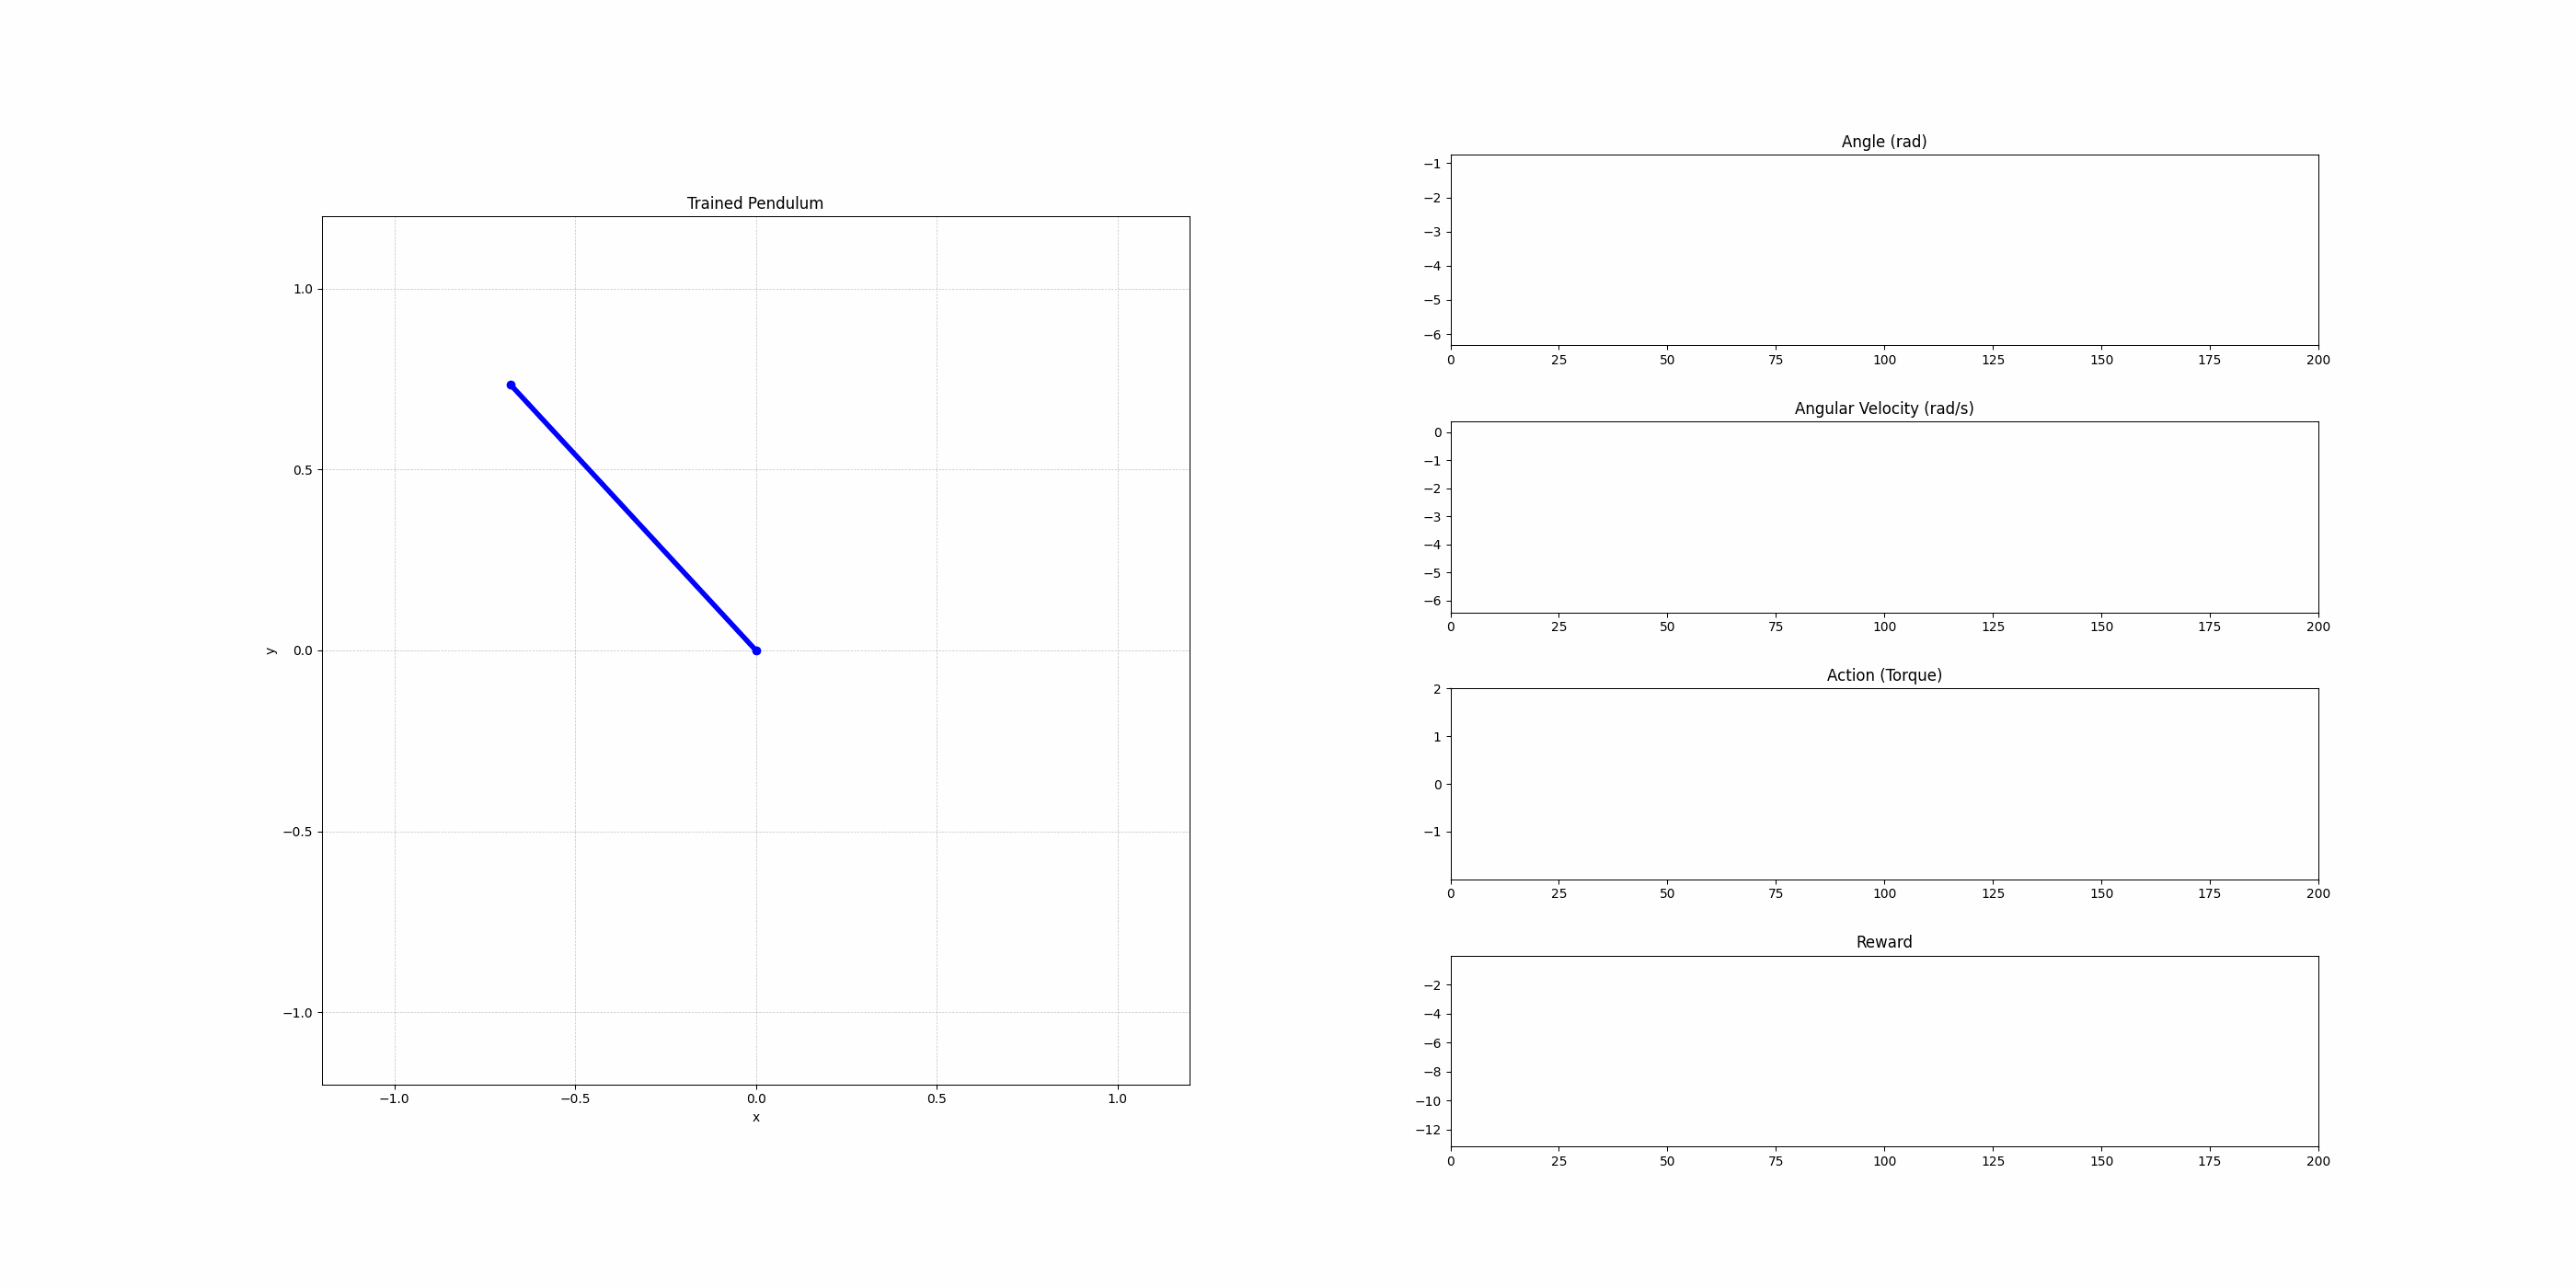

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image
import numpy as np

# Compute pendulum tip positions
L = env.L
x = L * np.sin(angles)
y = L * np.cos(angles)

# Convert collected data
states = np.array(states)
angles = states[:, 0]
angular_velocities = states[:, 1]
rewards = np.array(rewards)
actions = np.array(actions)

# Create figure and subplots
fig = plt.figure(figsize=(28, 14))
gs = fig.add_gridspec(4, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1, 1], wspace=0.3, hspace=0.4)

# Pendulum plot on the left (perfect square)
ax = fig.add_subplot(gs[:, 0], aspect='equal')  # Ensure square aspect ratio
ax.set_xlim(-L - 0.2, L + 0.2)
ax.set_ylim(-L - 0.2, L + 0.2)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Trained Pendulum")
ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
line, = ax.plot([], [], 'o-', lw=4, color='blue')

# Metric plots stacked on the right
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title("Angle (rad)")
ax1.set_xlim(0, len(angles))
ax1.set_ylim(np.min(angles), np.max(angles))
angle_line, = ax1.plot([], [], color='blue')

ax2 = fig.add_subplot(gs[1, 1])
ax2.set_title("Angular Velocity (rad/s)")
ax2.set_xlim(0, len(angular_velocities))
ax2.set_ylim(np.min(angular_velocities), np.max(angular_velocities))
angular_velocity_line, = ax2.plot([], [], color='green')

ax3 = fig.add_subplot(gs[2, 1])
ax3.set_title("Action (Torque)")
ax3.set_xlim(0, len(actions))
ax3.set_ylim(np.min(actions), np.max(actions))
action_line, = ax3.plot([], [], color='orange')

ax4 = fig.add_subplot(gs[3, 1])
ax4.set_title("Reward")
ax4.set_xlim(0, len(rewards))
ax4.set_ylim(np.min(rewards), np.max(rewards))
reward_line, = ax4.plot([], [], color='red')

# Initialize the animation
def init():
    line.set_data([], [])
    angle_line.set_data([], [])
    angular_velocity_line.set_data([], [])
    action_line.set_data([], [])
    reward_line.set_data([], [])
    return line, angle_line, angular_velocity_line, action_line, reward_line

# Update the animation with real-time data
def update(i):
    # Update pendulum position
    line.set_data([0, x[i]], [0, y[i]])

    # Update metric plots
    angle_line.set_data(range(i), angles[:i])
    angular_velocity_line.set_data(range(i), angular_velocities[:i])
    action_line.set_data(range(i), actions[:i])
    reward_line.set_data(range(i), rewards[:i])

    return line, angle_line, angular_velocity_line, action_line, reward_line

ani = animation.FuncAnimation(fig, update, frames=len(x), init_func=init, interval=30, blit=True)

# Save to GIF
gif_path = "../figs/trained_pendulum_with_metrics.gif"
ani.save(gif_path, writer="pillow", fps=30)
plt.close()

# Display the GIF
Image(filename=gif_path)
